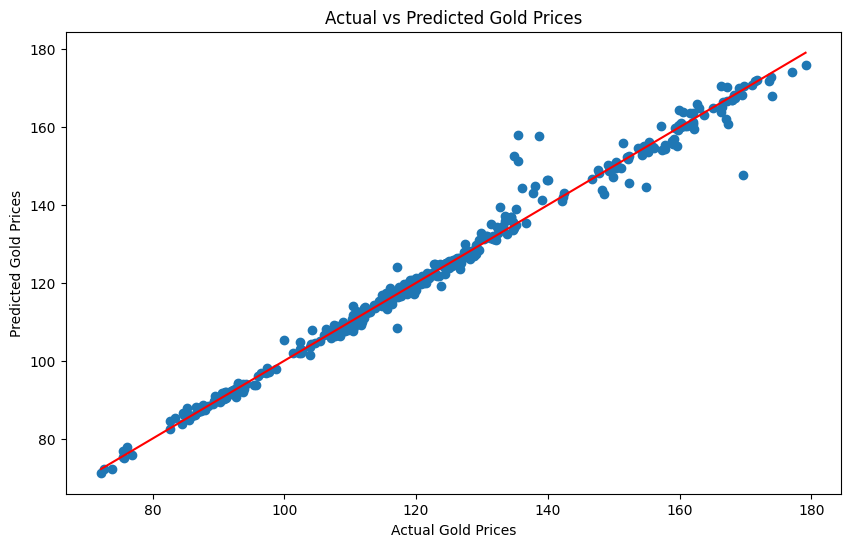

In [ ]:
# Importing necessary libraries
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Reading the dataset from the CSV file
df = pd.read_csv('gld_price_data.csv')

# Displaying the shape of the dataset (number of rows and columns)
df.shape  # Output: (2290, 6)

# Checking for missing values in each column
df.isnull().sum()

# Dropping the 'Date' column as it is not needed for prediction
df = df.drop(columns=['Date'])

# Visualizing the correlation matrix using Plotly Express
px.imshow(df.corr(), text_auto=True)

# Displaying the correlation of each feature with the target variable 'GLD'
df.corr()['GLD']

# Separating the features (X) and the target variable (y)
X = df.drop(columns=['GLD'])
y = df['GLD']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=345)

# Displaying the shape of the training and testing sets
X_train.shape, y_train.shape  # Output: ((1832, 4), (1832,))
X_test.shape, y_test.shape    # Output: ((458, 4), (458,))

# Initializing the Random Forest Regressor model
rfr = RandomForestRegressor()

# Training the model on the training data
rfr.fit(X_train, y_train)

# Predicting the gold prices for the testing data
rfr_prediction = rfr.predict(X_test)

# Calculating and displaying the Mean Absolute Error (MAE)
mean_absolute_error(y_test, rfr_prediction)  # Output: 1.3395399058296906

# Calculating and displaying the Mean Squared Error (MSE)
mean_squared_error(y_test, rfr_prediction)  # Output: 7.142444162289108

# Calculating and displaying the R² Score (coefficient of determination)
r2_score(y_test, rfr_prediction)  # Output: 0.9863465735466982

# Plotting the Actual vs Predicted Gold Prices
plt.figure(figsize=(10, 6))  # Setting the figure size
plt.scatter(y_test, rfr_prediction)  # Creating a scatter plot of actual vs predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Adding a 45-degree line for reference
plt.xlabel('Actual Gold Prices')  # Labeling the x-axis
plt.ylabel('Predicted Gold Prices')  # Labeling the y-axis
plt.title('Actual vs Predicted Gold Prices')  # Adding a title to the plot
plt.show()  # Displaying the plot
